In [8]:
# based on https://www.cs.colostate.edu/eeg/data/json/doc/tutorial/_build/html/getting_started.html#downloading-eeg-data

import json
import numpy as np
import matplotlib.pyplot as plt

data = json.load(open('..\\..\\data\\s20-gammasys-gifford-unimpaired.json','r'))

In [9]:
print(len(data))
data[0].keys()

8


dict_keys(['protocol', 'sample rate', 'notes', 'channels', 'device', 'location', 'date', 'eeg', 'impairment', 'subject'])

(9, 46330)
[[ 25.997  15.354  26.112 ...  23.708  17.242  15.45 ]
 [ 14.286   1.183   9.46  ...  16.003  10.109   4.787]
 [ 38.071  26.684  37.06  ...  30.632  30.136  26.321]
 ...
 [ -2.918 -16.613   0.42  ...  -3.872  -9.766  -9.193]
 [  2.689  -9.632  12.589 ...  20.504  17.3    20.847]
 [  0.      0.      0.    ... -43.      0.      0.   ]]


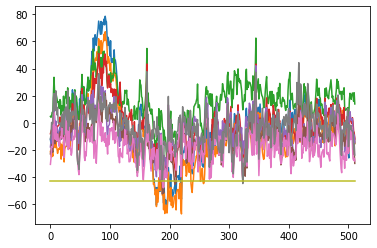

In [10]:
first = data[0]

eeg = np.array(first['eeg']['trial 1'])
print(eeg.shape)
print(eeg)

plt.figure(1);
plt.plot(eeg[:,4000:4512].T); #[:,4000:4512] : is X, 4000:4512 is part of Y **********LOOK UP .T
plt.axis('tight');             #Homework: learn how data is manipulated in np.arrays
                                #https://numpy.org/doc/stable/user/quickstart.html

Text(0.5, 1.0, 'MILK')

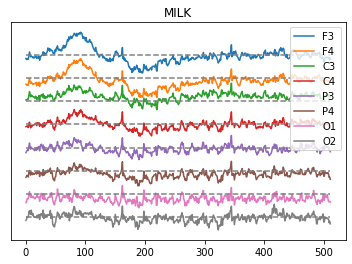

In [15]:
plt.figure(2);

plt.plot(eeg[:8,4000:4512].T + 80*np.arange(7,-1,-1));

plt.plot(np.zeros((512,8)) + 80*np.arange(7,-1,-1),'--',color='gray');

plt.yticks([]);

plt.legend(first['channels']);

plt.axis('tight');

plt.title('MILK')

In [12]:
dataGammasys = data

dataActivetwo = json.load(open('..\\..\\data\\s20-activetwo-gifford-unimpaired.json','r'))

dataMindset = json.load(open('..\\..\\data\\s20-mindset-gifford-unimpaired.json','r'))


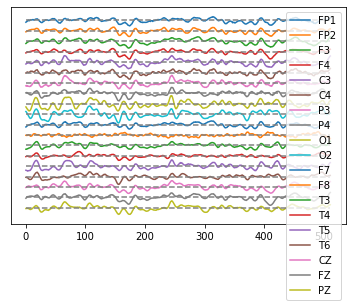

In [13]:
eegMindset = np.array(dataMindset[0]['eeg']['trial 1'])

plt.figure();

plt.plot(eegMindset[:19,4000:4512].T + 30*np.arange(18,-1,-1));

plt.plot(np.zeros((512,19)) + 30*np.arange(18,-1,-1),'--',color='gray');

plt.yticks([]);

plt.legend(dataMindset[0]['channels'], prop={'size':10});

plt.axis('tight');

In [16]:
eegActivetwo = np.array(dataActivetwo[1]['eeg']['trial 1'])

eegActivetwo.shape

(41, 185344)

In [17]:
#removing the linear trend
import scipy.signal as sig

eegActivetwo = sig.detrend(eegActivetwo,1)

ref = np.mean(eegActivetwo[36:38,:],axis=0).reshape((1,-1))

eeg = eegActivetwo[:32,:] - ref

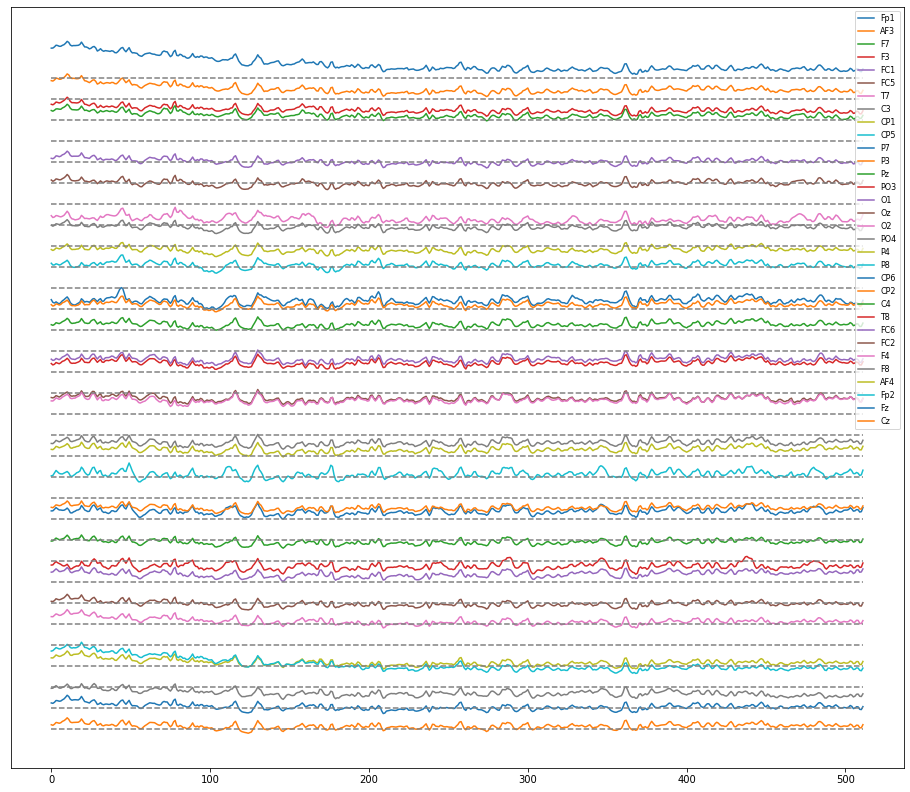

In [18]:
f = plt.figure();

plt.plot(eeg[:,4000:4512].T + 150*np.arange(31,-1,-1));

plt.plot(np.zeros((512,32)) + 150*np.arange(31,-1,-1),'--',color='gray');

plt.yticks([]);

plt.legend(dataActivetwo[0]['channels'][:32], prop={'size':8});

f.set_figwidth(16)
f.set_figheight(14)

plt.axis('tight');